# ASTR302 Lab 8: Spectroscopy

In this Lab you will reduce and analyze spectroscopic observations and determine a redshift.

## Spectroscopy Basics

You've taken a couple of spectra and have various calibration spectra. This lab will take you through calibration, rectification (applying the wavelength calibration so that a column in your 2-D spectrum correspond to a specific wavelength), background subtraction (so that you are left with only the spectrum of your target object), and extraction (to convert your 2-D spectrum to a 1-D spectrum. We will do all of this at a simplified level so that you can code it up, but there are more sophisticated treatments for each of these steps and PypeIt is an excellent version (for more information on PypeIt see Prochaska et al. (2020, arXiv and JOSS). You can get it at https://github.com/pypeit/PypeIt (although we won't be using it here). We will be using some data that they provide as part of one of their `cookbooks'.


In [1]:
# lets get what we'll need
import matplotlib.pyplot as plt
import csv
import astrometry
import pandas as pd
import astropy.units as u
import numpy as np
import matplotlib.image as mpimg

from astropy.io import fits
from astropy.wcs import WCS

Now lets get the data. The data we want is in https://drive.google.com/drive/folders/11ItdTKbY5c7Hfx-AnhSCvKcLW1g_mLAx
Download all of the images (you can select all and it will download the group as a gzip file that you can unpack on your machine and then upload them to datalab)

In [2]:
# this is a descriptive table of the images you have

#   filename |                 frametype |                 ra |                dec |     target | dispname |     decker | binning |                mjd |        airmass | exptime | dichroic | calib
# b1.fits.gz |                  arc,tilt | 140.44166666666663 |  37.43222222222222 |       Arcs | 600/4310 | 0.5 arcsec |     1,1 |  57162.06664467593 |            1.0 |    30.0 |      d55 |     0
# b3.fits.gz | pixelflat,illumflat,trace | 143.86791666666667 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 |  57162.07596400463 |            1.0 |    15.0 |      d55 |     0
# b4.fits.gz | pixelflat,illumflat,trace | 144.00458333333333 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.076341782406 |            1.0 |    15.0 |      d55 |     0
# b5.fits.gz | pixelflat,illumflat,trace | 144.14041666666665 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 |  57162.07671956019 |            1.0 |    15.0 |      d55 |     0
# b6.fits.gz | pixelflat,illumflat,trace | 144.27708333333334 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.077096064815 |            1.0 |    15.0 |      d55 |     0
# b7.fits.gz | pixelflat,illumflat,trace | 144.41291666666666 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 |  57162.07747175926 |            1.0 |    15.0 |      d55 |     0
# b8.fits.gz | pixelflat,illumflat,trace | 144.54874999999996 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.077847569446 |            1.0 |    15.0 |      d55 |     0
# b9.fits.gz | pixelflat,illumflat,trace |  144.6845833333333 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.078222916665 |            1.0 |    15.0 |      d55 |     0
#b10.fits.gz | pixelflat,illumflat,trace | 144.82041666666666 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 |  57162.07859895833 |            1.0 |    15.0 |      d55 |     0
#b11.fits.gz | pixelflat,illumflat,trace |            144.955 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 |  57162.07897476852 |            1.0 |    15.0 |      d55 |     0
#b12.fits.gz | pixelflat,illumflat,trace |  145.0908333333333 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.079351388886 |            1.0 |    15.0 |      d55 |     0
#b13.fits.gz | pixelflat,illumflat,trace | 145.22791666666666 |  37.43222222222222 |  Dome Flat | 600/4310 | 2.0 arcsec |     1,1 | 57162.079728240744 |            1.0 |    15.0 |      d55 |     0
#b14.fits.gz |                      bias | 172.34291666666664 |  36.86833333333333 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15420034722 |            1.0 |     0.0 |      d55 |     0
#b15.fits.gz |                      bias | 172.41833333333332 |  36.94444444444444 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15440162037 |            1.0 |     0.0 |      d55 |     0
#b16.fits.gz |                      bias | 172.49124999999995 |  36.97833333333333 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |    57162.154603125 |            1.0 |     0.0 |      d55 |     0
#b17.fits.gz |                      bias |  172.5645833333333 |  37.04694444444444 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15480474537 |            1.0 |     0.0 |      d55 |     0
#b18.fits.gz |                      bias | 172.63708333333332 |  37.11555555555556 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15500949074 |            1.0 |     0.0 |      d55 |     0
#b19.fits.gz |                      bias | 172.71166666666664 |  37.18611111111111 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15521145833 |            1.0 |     0.0 |      d55 |     0
#b20.fits.gz |                      bias | 172.78416666666666 | 37.254444444444445 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15541377315 |            1.0 |     0.0 |      d55 |     0
#b21.fits.gz |                      bias | 172.85708333333332 |  37.32361111111111 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15561504629 |            1.0 |     0.0 |      d55 |     0
#b22.fits.gz |                      bias |             172.93 |            37.3925 |       Bias | 600/4310 | 2.0 arcsec |     1,1 |  57162.15581597222 |            1.0 |     0.0 |      d55 |     0
#b23.fits.gz |                      bias | 173.00166666666667 |            37.4225 |       Bias | 600/4310 | 2.0 arcsec |     1,1 | 57162.156018981485 |            1.0 |     0.0 |      d55 |     0
#b27.fits.gz |                   science | 184.40291666666664 |  39.01111111111111 | J1217p3905 | 600/4310 | 2.0 arcsec |     1,1 |  57162.20663842592 |            1.0 |  1200.0 |      d55 |     0
#b28.fits.gz |                   science | 184.40416666666664 |  39.01111111111111 | J1217p3905 | 600/4310 | 2.0 arcsec |     1,1 |  57162.22085034722 |            1.0 |  1200.0 |      d55 |     0
#b24.fits.gz |                  standard | 189.47833333333332 |  24.99638888888889 |   Feige 66 | 600/4310 | 2.0 arcsec |     1,1 |  57162.17554351852 | 1.039999961853 |    30.0 |      d55 |     0

Now lets have a look at each of the types of images to get a better understanding. Lets first take a look at a bias frame.

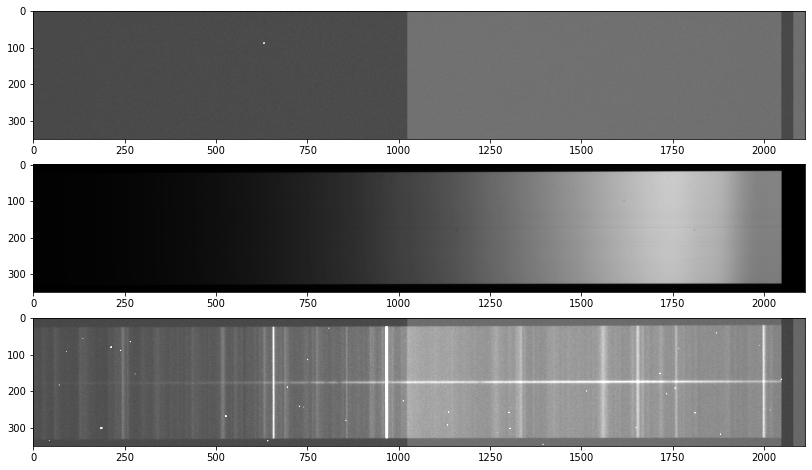

In [9]:
fig, axs = plt.subplots(3, 1,figsize=(20,8))

filename = 'b14.fits.gz'
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header

# plot the bias image, with minimum and maximum levels set by hand
ax1 = plt.subplot(311)
ax1.imshow(image,cmap='gray',vmin=900,vmax=1050)

# plot the flat field, with minimum and maximum levels set by hand
filename = 'b13.fits.gz'
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
ax2 = plt.subplot(312)
ax2.imshow(image,cmap='gray',vmin=900,vmax=45050)

# plot the flat field, with minimum and maximum levels set by hand
filename = 'b28.fits.gz'
hdu = fits.open(filename)[0]
image = hdu.data
hdr = hdu.header
ax3 = plt.subplot(313)
ax3.imshow(image,cmap='gray',vmin=900,vmax=1050)

Well, we have some interesting images! The bias is not uniform and what appears to be the overscan region on the far right, also appears to come in at two different values. This is a situation we have not encountered before, but it arises because each half of the CCD is read through a different amplifier. This helps speed the readout, but it does introduce two, slightly different bias levels. You will have to be careful here and use the first half of the overscan on the first half of each frame, and the second half of the bias, on the second half of each frame. Some fun coding for you!

The middle frame is the flat field, and again there is a bit of surprise here. Unlike in imaging where the illumination is roughly constant (or at least we try to make it roughly constant), here there is a very noticeable gradient. This is because along the x-axis we have the wavelength direction and it is nearly impossible to make a lamp that gives of equal amounts of light at each wavelength. Therefore, we are going to have remove this 'illumination pattern' and we will do that by fitting a polynomial along the x-axis and dividing it out. We will then have a `flat field' frame. The other thing we note is that no light is getting to the detector at the top and bottom. We will want to trim those regions off ALL of the frames before we even get started (no point in carrying useless pixels around with us).

The last of the three frames is a science frame. The bright horizontal line is the spectrum of the object we observed. The vertical lines are sky lines. We'll get back to this frame after trimming, debiasing, and flat fielding our frames.

In [4]:
# first step : identify the strips at the top and bottom of the flat field frames that are not getting light. Trim those regions from all of the images

# insert code to do that here

In [5]:
# second step : identify the regions of the bias frames that correspond to the first half of the CCD and its corresponding overscan region, 
# and the second half of the CCD and its corresponding oversacan.

# subtract the corresponding overscan region (you can use a mean value - you do not need to fit along the vertical axis) from each half and show 
# the resulting bias frame here so that you can confirm the code works as you expect it to. Don't forget to trim off the overscan regions, we don't 
# any more.

# If all looks good, apply the same bias subtraction approach to all of the frames

# Combine all of the bias frames to get a master bias frame. Are there any noticeable residuals left? If yes, then subtract
# this master bias from all of the non-bias frames.

# insert code to do that here

In [6]:
# third step : remove illumination pattern from flat field frames

# fit a polynomial to the gradient seen along the wavelength axis in the flat field frames. Divide the flat field frames by the 
# resulting polynomial to normalize out the gradient

# Show image to confirm that the code is working as expected

# If all looks good, then do this for all of the flats, combine to get a master flat, and use that master flat to flat field
# the arc, science, and standard frames

# insert code to do that here

That concludes the basic data reduction steps. Now we need to do wavelenght calibration. For that we will use the arc spectrum (this is 
a spectrum of a calibration lamp, which tend to have inert gases (He, Ne, Ar, ...). You will match the lines you observe to a calibration spectrum to figure out which wavelength corresponds to which pixel. Below is a plot of the calibration lines and their wavelengths.
                                                       

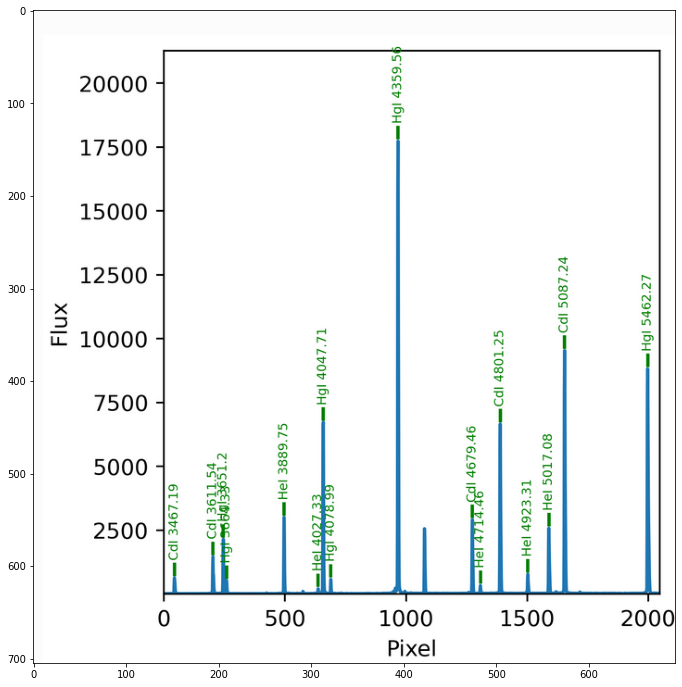

In [7]:
# upload calibration.png from the class website

img = mpimg.imread('calibration.png')

fig, ax = plt.subplots(figsize=(12, 12))
imgplot = plt.imshow(img)
plt.show()                                                          

Now lets take a horizontal cut in the middle of our calibration lamp image and fit the line locations.

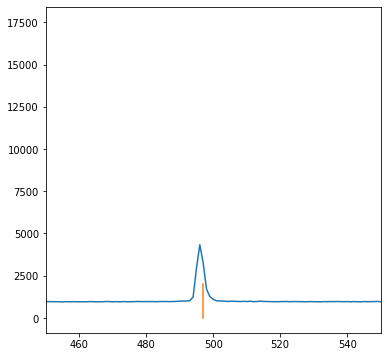

In [8]:
from scipy import optimize

#  define gaussian function to fit to the lines
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-(x - mean)**2/stddev)

# load the calibration file
filename = 'b1.fits.gz'
hdu = fits.open(filename)[0]
image_lamp = hdu.data
hdr_lamp = hdu.header

# plot the calibration file to get the line centers in pixel coordiantes
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(image_lamp[100,:])
# lets set the coordiantes to isolate one line
ax.set_xlim(450,550)  # you can change this to isolate other lines
ax.plot((497,497),(0,2000))  # close enough to let gaussian get center
plt.show()   

In [ ]:
# now lets fit the line to get the precise center

input_line_center = 497
x = np.arange(450,550,1) - input_line_center
y = image_lamp[100,450:550] - np.mean(image_lamp[100,10:20])

popt, _ = optimize.curve_fit(gaussian, x, y)
plt.show() 

fig, ax = plt.subplots(figsize=(6, 6))

fit_y = gaussian(x, popt[0], popt[1], popt[2]) 
ax.plot(x + input_line_center, fit_y, 'o' )
ax.plot(x + input_line_center, y, '-')

plt.show()  

print('Line center is = ',input_line_center + popt[1])

Now that you can find the line center for a given line, do this for two more lines in the code box above. Identify in the comments which lines these are (i.e. what their wavelengths are). In reality you would do this for as many of the emission lines across the spectrum as you can and associate these line centers with the wavelength values in the calibrated spectrum. You would then also do this for other rows and have a grid pattern of pixel, wavelength values that you could interpolate to transform your image from one on a pixel value grid to one on a wavelength value grid.

In the interest of expediency, we will not do the wavelength calibration and transformation described above and proceed as if it had been done. As such we will treat the pixel value of the image as the wavelength for the next few steps. 

We will next work on background subtraction. The idea of background subtraction is that there are parts of the spectrum (along the spatial direction) that are just background. If we calculate what the background level is within these areas, and then subtract that value from everywhere, we will get a background-free spectral image. We need to do this separately at each wavelenght because the background is not uniform across wavelength. 

Looking at the science image when we first plotted it, it looks like rows 0 to 100 and 200 to 300 avoid the object spectrum. So we are going to calulate the mean background in each color over those rows and subtract.

In [ ]:
# multiply by 1.0 to turn it to float to avoid weird integer math problems
image_back = image*1.0

for i in range(image.shape[1]):
    background = (np.median(image[50:100,i]) + np.median(image[250:300,i]))/2.0
    for j in range(image.shape[0]):
        image_back[j,i] = float(image[j,i] - background)

# lets display the before and after for comparison
fig, axs = plt.subplots(2, 1,figsize=(20,8))
ax0 = plt.subplot(211)
ax0.imshow(image,cmap='gray',vmin=900,vmax=1050)

# you may need to adjust the display levels for your image
ax1 = plt.subplot(212)
ax1.imshow(image_back,cmap='gray',vmin=-20,vmax=20)

<div class="alert alert-info">How does the subtraction look? Do you see any problems? What do you attribute any problems you might see?</div>

<div class="alert alert-block alert-success">
Answer:
</div>

Now lets extract the one dimensional spectrum. We should trace the spectrum across the image because it might not track exactly along rows, but here we are going to assume it does. You'll need to identify what rows the spectrum falls on and then extract (i.e. turn those rows into a 1 dimensional spectrum). Write the code to do that and display the spectrum.

In [2]:
#write your code to extract and plot the 1-dimensional spectrum


SyntaxError: invalid syntax (4159103266.py, line 1)

## Conclusion: 

 <div class="alert alert-info">Save your notebook.  Delete the images, you won't need them again. Append your LastNameFirstInitial to the filename and submit via D2L </div>